In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..')))  # access sibling directories
from src.python.settings import plotting_settings, plotting_update
plt.rcParams.update(plotting_update)

/home/ho/programs/anaconda3/envs/bfdev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ho/programs/anaconda3/envs/bfdev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ho/programs/anaconda3/envs/bfdev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ho/programs/anaconda3/envs/bfdev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

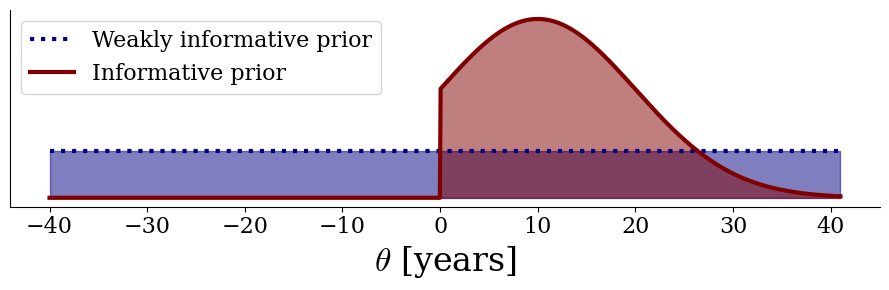

In [78]:
prior_low = -40
prior_high = 41

lower_bound = 0
upper_bound = prior_high
prior_mean = 10
prior_std = 10

uniform_support = np.linspace(prior_low, prior_high,2)
uniform_density = stats.uniform.pdf(uniform_support, loc=prior_low, scale=prior_high-prior_low)

trunc_norm_support = np.linspace(prior_low, prior_high, 1000)
trunc_norm_density = stats.truncnorm.pdf(trunc_norm_support,(lower_bound - prior_mean) / prior_std,
                                    (upper_bound - prior_mean) / prior_std,
                                    loc=prior_mean, scale=prior_std)



ALPHA = 0.5
f, ax = plt.subplots(1, 1, figsize=(9, 3))

sns.lineplot(x=uniform_support, y=uniform_density,
             ax=ax, label="Weakly informative prior",
             color=plotting_settings["colors"][1],
             linestyle='dotted', linewidth=3,
             )

sns.lineplot(x=trunc_norm_support, y=trunc_norm_density,
             ax=ax, label="Informative prior",
             color=plotting_settings["colors"][0],
             linestyle='solid', linewidth=3,
             )
#ax.fill_between(x=trunc_norm_support, y1=0, y2=trunc_norm_density,
#                color=line.get_color(), alpha=alpha, **kwargs)



for line in ax.lines:
    x, y = line.get_xydata().T
    ax.fill_between(x, 0, y, color=line.get_color(), alpha=ALPHA)

plt.yticks([])
sns.despine(ax=ax)
ax.set_xlabel(r'$\theta$ [years]')
plt.tight_layout()
plt.savefig("figures/climate_priors.pdf")